# Phase Contrast (PC) calculation tutorial

Start by importing the required libraries and defining some settings:

In [1]:
import os
from tabulate import tabulate
import matplotlib.pyplot as plt

from ukat.data import fetch
from ukat.vessels.phase_contrast import PhaseContrast

# Ensure figures are rendered in the notebook
%matplotlib inline

# Initialise output path for PC outputs
directory = 'phase_calculation_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)

Retrieve PC test data using our data fetcher. The first time the fetcher is run, it will download the data from the
internet, after that it will just use the cached local data.

This will return 5 variables:
* `magnitude`: a 3D array with the magnitude data at all trigger delay times (phase).
* `vel_array`: a 3D array with the phase data at all trigger delay times (phase).
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).
* `mask`: a 3D boolean matrix with the pixels to fit/calculate.
* `velocity_encoding`: returns a float values of the velocity encoding in cm/s

In [2]:
# Fetch test data
magnitude, vel_array, mask, affine, velocity_encoding = fetch.phase_contrast_left_philips()

Calculate velocity and flow (RBF) parameters using the `PhaseContrast` class implemented in `mapping`:

In [3]:
# Initialise PC mapping object
mapper = PhaseContrast(vel_array, affine, mask=mask)

velocity_plot = mapper.mean_velocity_phase
rbf_plot = mapper.rbf

# Save output maps to Nifti
mapper.to_nifti(output_directory=OUTPUT_DIR, base_file_name='Philips_Left')

Plot the **velocity** and the **rbf** per trigger delay time (also known as phase).

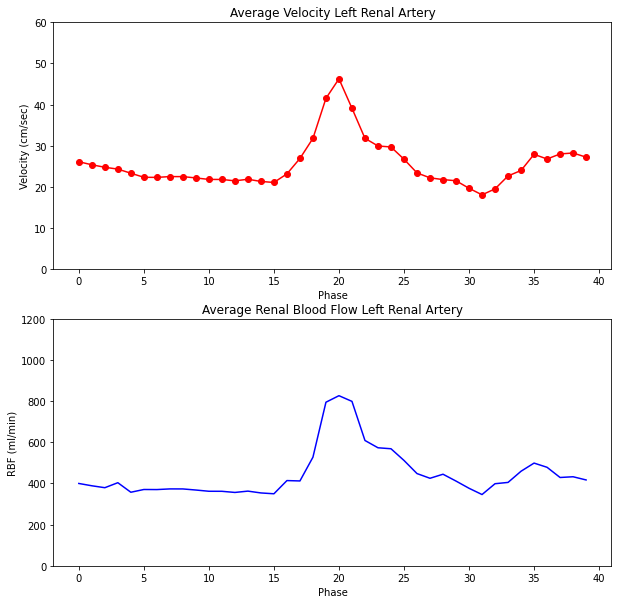

Mean Velocity: 25.57730254026419 cm/sec
Mean RBF: 448.3799164652045 ml/min
Resistive Index: 0.6089871033735511


In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Velocity
ax1.plot(velocity_plot, 'ro-')
ax1.set_ylabel('Velocity (cm/sec)')
ax1.set_xlabel('Phase')
ax1.set_ylim(0, 60)
ax1.set_title('Average Velocity Left Renal Artery')

# RBF
ax2.plot(rbf_plot, 'b-')
ax2.set_ylabel('RBF (ml/min)')
ax2.set_xlabel('Phase')
ax2.set_ylim(0, 1200)
ax2.set_title('Average Renal Blood Flow Left Renal Artery')

plt.show()

print("Mean Velocity: " + str(mapper.mean_velocity) + " cm/sec")
print("Mean RBF: " + str(mapper.mean_rbf) + " ml/min")
print("Resistive Index: " + str(mapper.resistive_index))

In [6]:
# Print the stats_table dictionary
mapper.print_stats_table()
# Save table with the results
csv_path = os.path.join(OUTPUT_DIR, "pc_left_output.csv")
mapper.save_stats_table_to_csv(csv_path)

|    |   Phase |   RBF (ml/min) |   Area (cm2) |   Nr Pixels |   Mean Vel (cm/s) |   Min Vel (cm/s) |   Max Vel (cm/s) |   StdDev Vel (cm/s) |
|----|---------|----------------|--------------|-------------|-------------------|------------------|------------------|---------------------|
|  0 |   0.000 |        399.858 |        0.255 |      12.000 |            26.113 |           22.442 |           30.061 |               2.653 |
|  1 |   1.000 |        388.640 |        0.255 |      12.000 |            25.381 |           21.807 |           27.717 |               1.659 |
|  2 |   2.000 |        379.291 |        0.255 |      12.000 |            24.770 |           20.684 |           26.886 |               1.867 |
|  3 |   3.000 |        403.566 |        0.276 |      13.000 |            24.328 |           20.537 |           26.740 |               2.007 |
|  4 |   4.000 |        357.229 |        0.255 |      12.000 |            23.329 |           17.607 |           27.082 |               3.057 |